In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [5]:
train = pd.read_csv('train_tweet.csv')
test = pd.read_csv('test_tweets.csv')

print(train.shape)
print(test.shape)

(31962, 3)
(17197, 2)


In [6]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [7]:
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [8]:
train.isnull().any()
test.isnull().any()

id       False
tweet    False
dtype: bool

In [9]:
# checking out the negative comments from the train set

train[train['label'] == 0].head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [10]:
# checking out the postive comments from the train set 

train[train['label'] == 1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...
14,15,1,no comment! in #australia #opkillingbay #se...
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'...
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk fol...
77,78,1,"@user hey, white people: you can call people '..."
82,83,1,how the #altright uses &amp; insecurity to lu...
111,112,1,@user i'm not interested in a #linguistics tha...


<AxesSubplot:>

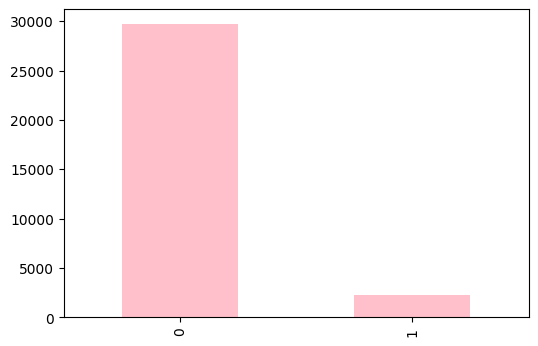

In [11]:
train['label'].value_counts().plot.bar(color = 'pink', figsize = (6, 4))

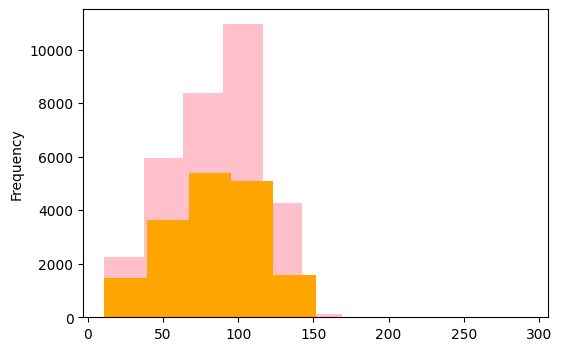

In [12]:
# checking the distribution of tweets in the data

length_train = train['tweet'].str.len().plot.hist(color = 'pink', figsize = (6, 4))
length_test = test['tweet'].str.len().plot.hist(color = 'orange', figsize = (6, 4))

In [13]:
# adding a column to represent the length of the tweet

train['len'] = train['tweet'].str.len()
test['len'] = test['tweet'].str.len()

train.head(10)

,id,label,tweet,len
0,1,0,@user when a father is dysfunctional and is s...,102
1,2,0,@user @user thanks for #lyft credit i can't us...,122
2,3,0,bihday your majesty,21
3,4,0,#model i love u take with u all the time in ...,86
4,5,0,factsguide: society now #motivation,39
5,6,0,[2/2] huge fan fare and big talking before the...,116
6,7,0,@user camping tomorrow @user @user @user @use...,74
7,8,0,the next school year is the year for exams.ð...,143
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,87
9,10,0,@user @user welcome here ! i'm it's so #gr...,50


In [14]:

train.groupby('label').describe()

id                                                               \
         count          mean          std   min      25%      50%       75%   
label                                                                         
0      29720.0  15974.454441  9223.783469   1.0  7981.75  15971.5  23965.25   
1       2242.0  16074.896075  9267.955758  14.0  8075.25  16095.0  24022.00   

                    len                                                        
           max    count       mean        std   min   25%   50%    75%    max  
label                                                                          
0      31962.0  29720.0  84.328634  29.566484  11.0  62.0  88.0  107.0  274.0  
1      31961.0   2242.0  90.187779  27.375502  12.0  69.0  96.0  111.0  152.0

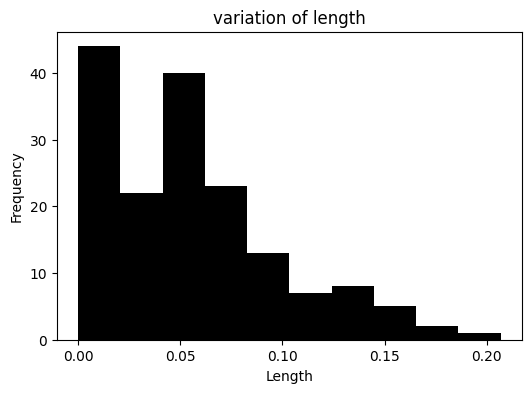

In [15]:
train.groupby('len').mean()['label'].plot.hist(color = 'black', figsize = (6, 4),)
plt.title('variation of length')
plt.xlabel('Length')
plt.show()

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

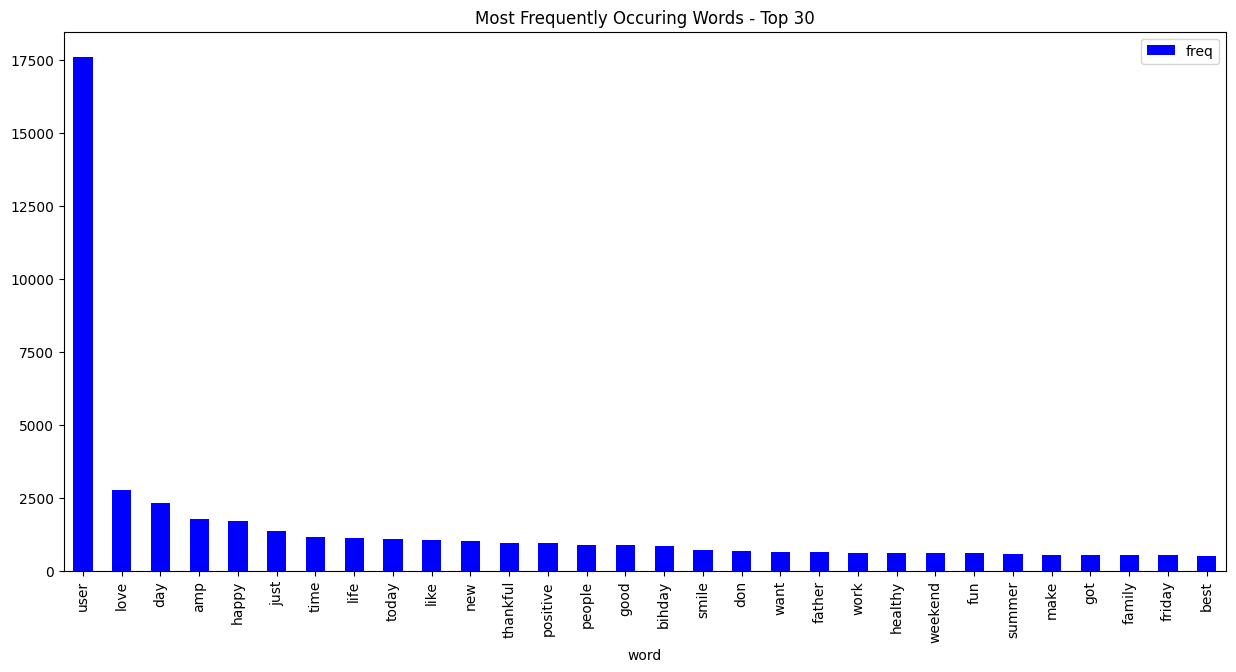

In [16]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(train.tweet)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")


Text(0.5, 1.0, 'WordCloud - Vocabulary from Reviews')

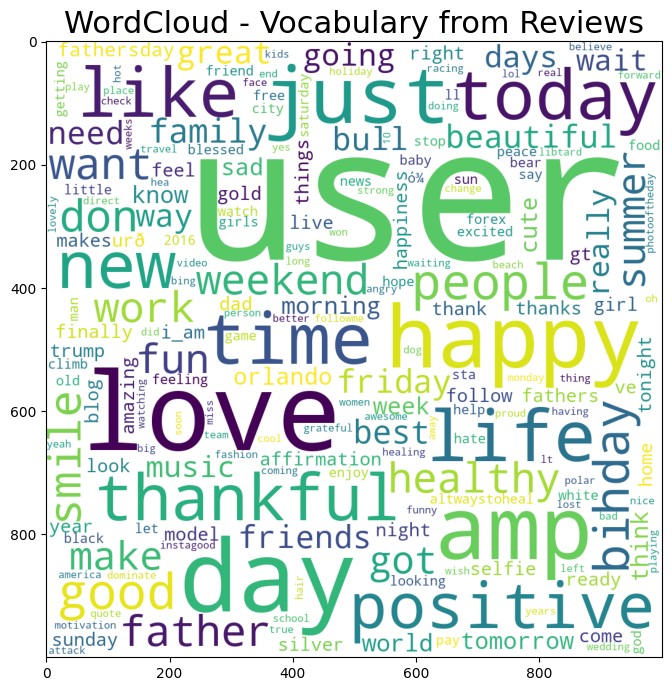

In [17]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from Reviews", fontsize = 22)

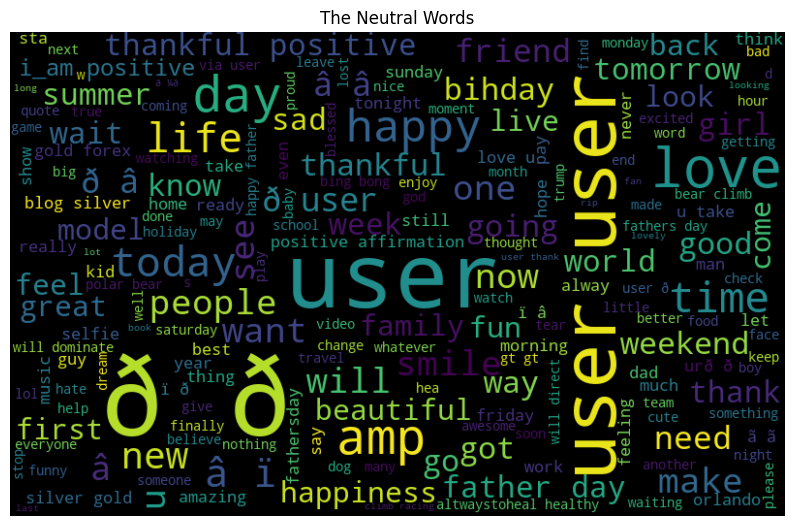

In [18]:
normal_words =' '.join([text for text in train['tweet'][train['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Neutral Words')
plt.show()


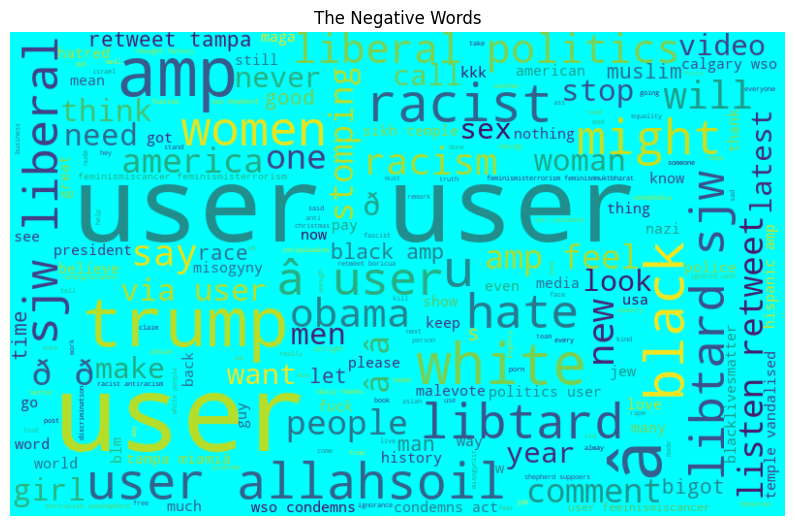

In [19]:
negative_words =' '.join([text for text in train['tweet'][train['label'] == 1]])

wordcloud = WordCloud(background_color = 'cyan', width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words')
plt.show()


In [20]:
# collecting the hashtags

def hashtag_extract(x):
    hashtags = []
    
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [27]:
import re
# extracting hashtags from non racist/sexist tweets
HT_regular = hashtag_extract(train['tweet'][train['label'] == 0])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(train['tweet'][train['label'] == 1])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

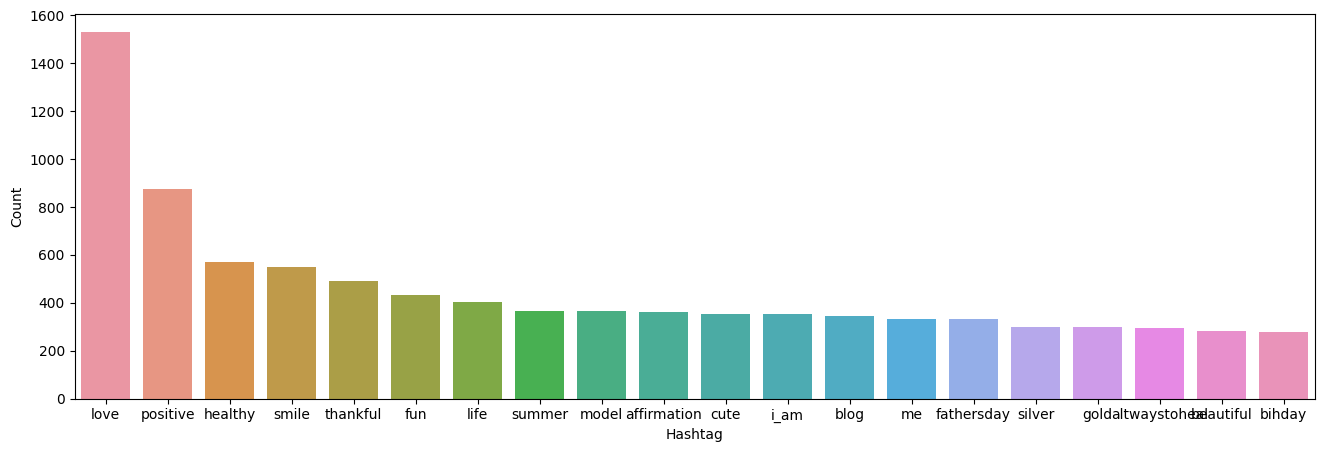

In [28]:
import nltk

a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

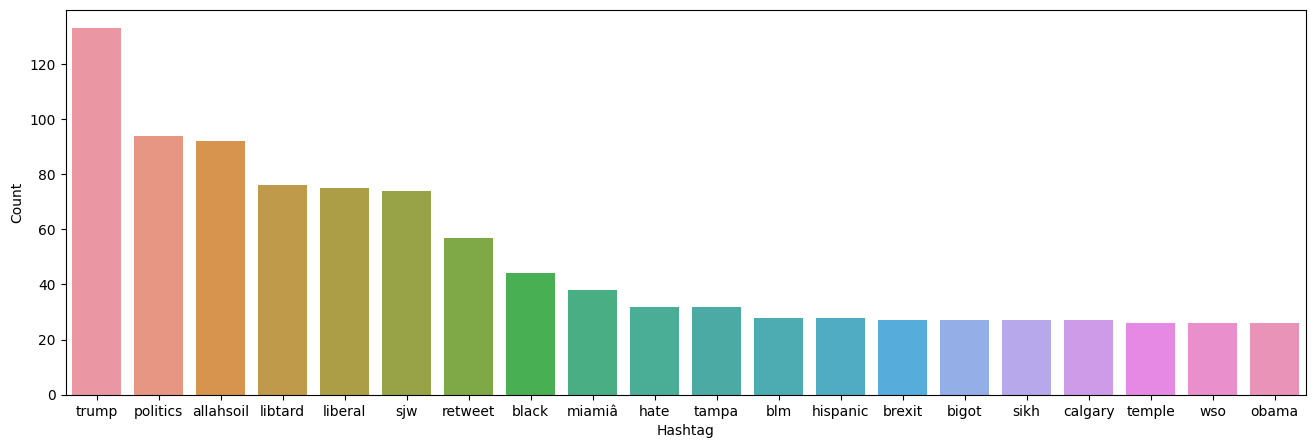

In [29]:
a = nltk.FreqDist(HT_negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [30]:
# tokenizing the words present in the training set
tokenized_tweet = train['tweet'].apply(lambda x: x.split()) 

# importing gensim
import gensim

# creating a word to vector model
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200, # desired no. of features/independent variables 
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(train['tweet']), epochs=20)

(6109532, 8411580)

In [31]:
model_w2v.wv.most_similar(positive = "dinner")

[('spaghetti', 0.6816089153289795),
 ('#prosecco', 0.630700409412384),
 ('#wanderlust', 0.6180500984191895),
 ('podium', 0.605297863483429),
 ('coaching', 0.5998468995094299),
 ('willow', 0.5991374850273132),
 ('#marbs', 0.5971853733062744),
 ('#boardgames', 0.5935341119766235),
 ('#restaurant', 0.5933234691619873),
 ('snuggle', 0.5929118394851685)]

In [32]:
model_w2v.wv.most_similar(positive = "cancer")

[('champion,', 0.7411875128746033),
 ('level.', 0.7248197793960571),
 ('law.', 0.7196904420852661),
 ('targeted', 0.7117592096328735),
 ('roots', 0.7105616331100464),
 ('ownership', 0.7051411867141724),
 ('answer.', 0.7045292258262634),
 ('politicizing', 0.7043181657791138),
 ('ways.', 0.703823983669281),
 ('spots.', 0.703564465045929)]

In [33]:
model_w2v.wv.most_similar(positive = "apple")

[('"mytraining"', 0.7212403416633606),
 ('mytraining', 0.717631459236145),
 ('training"', 0.699110746383667),
 ('app,', 0.6312862634658813),
 ('"my', 0.6182026863098145),
 ('app', 0.6037683486938477),
 ('ta', 0.6000683903694153),
 ('humans.', 0.581613302230835),
 ('heroku', 0.5797484517097473),
 ("domino's", 0.570280909538269)]

In [34]:
model_w2v.wv.most_similar(negative = "hate")

[('#apple', -0.019813023507595062),
 ('#games', -0.025767728686332703),
 ('stas', -0.03013160079717636),
 ('#hype', -0.04500829800963402),
 ('#fundraising', -0.05105682462453842),
 ('#yay', -0.05330277234315872),
 ('â\x80¦', -0.053785502910614014),
 ('eyes', -0.058167099952697754),
 ('season', -0.0584699809551239),
 ('you?', -0.07185627520084381)]

In [35]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models.doc2vec import LabeledSentence

In [36]:
def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(LabeledSentence(s, ["tweet_" + str(i)]))
    return output

# label all the tweets
labeled_tweets = add_label(tokenized_tweet)

labeled_tweets[:6]

C:\Users\sivas\AppData\Local\Temp\ipykernel_7412\2587694538.py:4: DeprecationWarning: Call to deprecated `LabeledSentence` (Class will be removed in 4.0.0, use TaggedDocument instead).
  output.append(LabeledSentence(s, ["tweet_" + str(i)]))


[LabeledSentence(words=['@user', 'when', 'a', 'father', 'is', 'dysfunctional', 'and', 'is', 'so', 'selfish', 'he', 'drags', 'his', 'kids', 'into', 'his', 'dysfunction.', '#run'], tags=['tweet_0']),
 LabeledSentence(words=['@user', '@user', 'thanks', 'for', '#lyft', 'credit', 'i', "can't", 'use', 'cause', 'they', "don't", 'offer', 'wheelchair', 'vans', 'in', 'pdx.', '#disapointed', '#getthanked'], tags=['tweet_1']),
 LabeledSentence(words=['bihday', 'your', 'majesty'], tags=['tweet_2']),
 LabeledSentence(words=['#model', 'i', 'love', 'u', 'take', 'with', 'u', 'all', 'the', 'time', 'in', 'urð\x9f\x93±!!!', 'ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91', 'ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦'], tags=['tweet_3']),
 LabeledSentence(words=['factsguide:', 'society', 'now', '#motivation'], tags=['tweet_4']),
 LabeledSentence(words=['[2/2]', 'huge', 'fan', 'fare', 'and', 'big', 'talking', 'before', 'they', 'leave.', 'chaos', 'and', 'pay', 'disputes', 'when', 'they', 'get', 'there.', '#allshowandn

In [37]:
# removing unwanted patterns from the data

import re
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sivas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [38]:
train_corpus = []

for i in range(0, 31962):
  review = re.sub('[^a-zA-Z]', ' ', train['tweet'][i])
  review = review.lower()
  review = review.split()
  
  ps = PorterStemmer()
  
  # stemming
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  
  # joining them back with space
  review = ' '.join(review)
  train_corpus.append(review)

In [39]:
test_corpus = []

for i in range(0, 17197):
  review = re.sub('[^a-zA-Z]', ' ', test['tweet'][i])
  review = review.lower()
  review = review.split()
  
  ps = PorterStemmer()
  
  # stemming
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  
  # joining them back with space
  review = ' '.join(review)
  test_corpus.append(review)

In [40]:
# creating bag of words

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)
x = cv.fit_transform(train_corpus).toarray()
y = train.iloc[:, 1]

print(x.shape)
print(y.shape)


(31962, 2500)
(31962,)


In [41]:
# creating bag of words

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)
x_test = cv.fit_transform(test_corpus).toarray()

print(x_test.shape)


(17197, 2500)


In [42]:
# splitting the training data into train and valid sets

from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.25, random_state = 42)

print(x_train.shape)
print(x_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(23971, 2500)
(7991, 2500)
(23971,)
(7991,)


In [43]:
# standardization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_valid = sc.transform(x_valid)
x_test = sc.transform(x_test)


# Model Building

    ~ Random Forest Classifier ~

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

rf = RandomForestClassifier()
rf.fit(x_train, y_train)

y_pred_rf = rf.predict(x_valid)

print("Training Accuracy :", rf.score(x_train, y_train))
print("Validation Accuracy :", rf.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("F1 score :", f1_score(y_valid, y_pred_rf))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred_rf)
print(cm)

Training Accuracy : 0.9991656585040257
Validation Accuracy : 0.9506945313477663
F1 score : 0.602020202020202
[[7299  133]
 [ 261  298]]


In [53]:
print("Accuracy of train data {0:.2f}".format(rf.score(x_train, y_train)))
print("Accuracy of validation data {0:.2f}".format(rf.score(x_valid, y_valid)))
print("f1 score {0:.2f}".format(f1_score(y_valid, y_pred_rf)))

accuracy_rf_train = rf.score(x_train, y_train)
accuracy_rf_val = rf.score(x_valid, y_valid)
F1_Score_rf = f1_score(y_valid, y_pred_rf)

Accuracy of train data 1.00
Accuracy of validation data 0.95
f1 score 0.60


    ~ Logistic Regression ~

In [54]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train, y_train)

y_pred_lr = lr.predict(x_valid)

print("Training Accuracy :", lr.score(x_train, y_train))
print("Validation Accuracy :", lr.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred_lr))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred_lr)
print(cm)


C:\Users\sivas\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accuracy : 0.9851487213716574
Validation Accuracy : 0.9416843949443123
f1 score : 0.5933682373472949
[[7185  247]
 [ 219  340]]


In [55]:
print("Accuracy of train data {0:.2f}".format(lr.score(x_train, y_train)))
print("Accuracy of validation data {0:.2f}".format(lr.score(x_valid, y_valid)))
print("f1 score {0:.2f}".format(f1_score(y_valid, y_pred_lr)))

accuracy_lr_train = lr.score(x_train, y_train)
accuracy_lr_val = lr.score(x_valid, y_valid)
F1_Score_lr = f1_score(y_valid, y_pred_lr)

Accuracy of train data 0.99
Accuracy of validation data 0.94
f1 score 0.59


    ~ Decision Tree Classifier ~

In [56]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

y_pred_dt = dt.predict(x_valid)

print("Training Accuracy :", dt.score(x_train, y_train))
print("Validation Accuracy :", dt.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred_dt))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred_dt)
print(cm)


Training Accuracy : 0.9991656585040257
Validation Accuracy : 0.932048554623952
f1 score : 0.5370843989769821
[[7133  299]
 [ 244  315]]


In [62]:
print("Accuracy of train data {0:.2f}".format(dt.score(x_train, y_train)))
print("Accuracy of validation data {0:.2f}".format(dt.score(x_valid, y_valid)))
print("f1 score {0:.2f}".format(f1_score(y_valid, y_pred_dt)))

accuracy_dt_train = dt.score(x_train, y_train)
accuracy_dt_val = dt.score(x_valid, y_valid)
F1_Score_dt = f1_score(y_valid, y_pred_dt)

Accuracy of train data 1.00
Accuracy of validation data 0.93
f1 score 0.54


    ~ SVM ~

In [58]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)

y_pred_svc = svc.predict(x_valid)

print("Training Accuracy :", svc.score(x_train, y_train))
print("Validation Accuracy :", svc.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred_svc))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred_svc)
print(cm)


Training Accuracy : 0.978181969880272
Validation Accuracy : 0.9521962207483419
f1 score : 0.4986876640419947
[[7419   13]
 [ 369  190]]


In [59]:
print("Accuracy of train data {0:.2f}".format(svc.score(x_train, y_train)))
print("Accuracy of validation data {0:.2f}".format(svc.score(x_valid, y_valid)))
print("f1 score {0:.2f}".format(f1_score(y_valid, y_pred_svc)))

accuracy_svc_train = svc.score(x_train, y_train)
accuracy_svc_val = svc.score(x_valid, y_valid)
F1_Score_svc = f1_score(y_valid, y_pred_svc)

Accuracy of train data 0.98
Accuracy of validation data 0.95
f1 score 0.50


    ~ XGB Classifier ~

In [60]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(x_train, y_train)

y_pred_xgb = xgb.predict(x_valid)

print("Training Accuracy :", xgb.score(x_train, y_train))
print("Validation Accuracy :", xgb.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred_xgb))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred_xgb)
print(cm)

Training Accuracy : 0.9603687789412206
Validation Accuracy : 0.9555750218996371
f1 score : 0.5748502994011976
[[7396   36]
 [ 319  240]]


In [61]:
print("Accuracy of train data {0:.2f}".format(xgb.score(x_train, y_train)))
print("Accuracy of validation data {0:.2f}".format(xgb.score(x_valid, y_valid)))
print("f1 score {0:.2f}".format(f1_score(y_valid, y_pred_xgb)))

accuracy_xgb_train = xgb.score(x_train, y_train)
accuracy_xgb_val = xgb.score(x_valid, y_valid)
F1_Score_xgb = f1_score(y_valid, y_pred_xgb)

Accuracy of train data 0.96
Accuracy of validation data 0.96
f1 score 0.57


## Model Comparison

In [63]:
data_results = pd.DataFrame({'classifier':['RF','LR','DT','SVC','XGB'],
                           'accuracy of train data':[accuracy_rf_train,accuracy_lr_train,accuracy_dt_train,accuracy_svc_train,accuracy_xgb_train],
                           'accuracy of val data':[accuracy_rf_val,accuracy_lr_val,accuracy_dt_val,accuracy_svc_val,accuracy_xgb_val],
                           'f1_score':[F1_Score_rf,F1_Score_lr,F1_Score_dt,F1_Score_svc,F1_Score_xgb]
                          })

In [64]:
data_results.set_index('classifier', inplace = True)
data_results

,accuracy of train data,accuracy of val data,f1_score
classifier,,,
RF,0.999166,0.950695,0.602020
LR,0.999166,0.932049,0.593368
DT,0.999166,0.932049,0.537084
SVC,0.978182,0.952196,0.498688
XGB,0.960369,0.955575,0.574850


## Accuracy_of_train_data

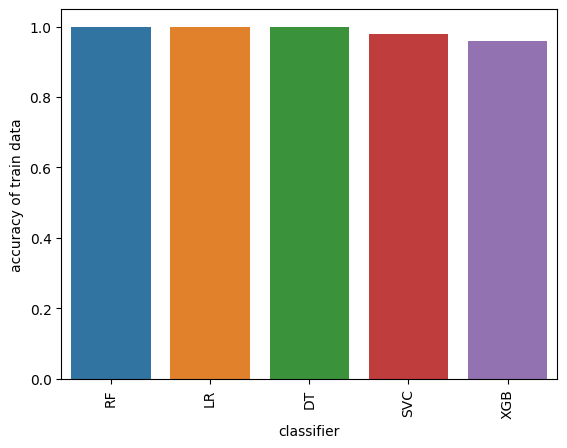

In [65]:
plot = sns.barplot(data=data_results, x=data_results.index, y=data_results['accuracy of train data'])
plt.xticks(rotation = 90)
plt.show()

## Accuracy_of_validation_data

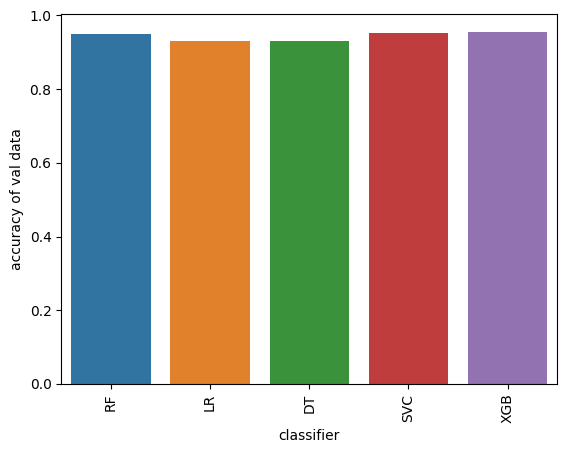

In [67]:
plot = sns.barplot(data=data_results, x=data_results.index, y=data_results['accuracy of val data'])
plt.xticks(rotation = 90)
plt.show()

## F1_Score

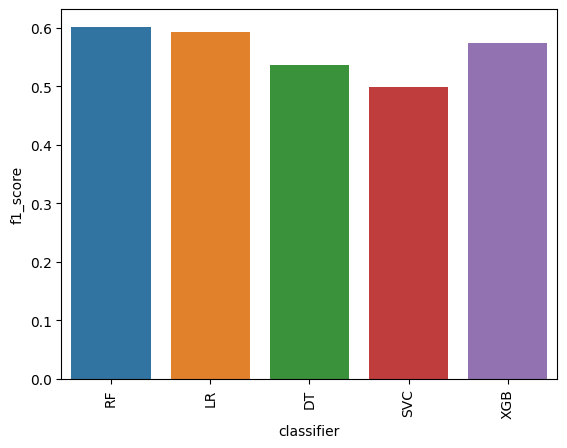

In [68]:
plot = sns.barplot(data=data_results, x=data_results.index, y=data_results['f1_score'])
plt.xticks(rotation = 90)
plt.show()

1. From the above comparison of models we can see that some of the models lead to over-fitting.
2. Models having accuracy score over-fitting : 'Logistic_Regression', 'Random_Forest_Classifier' and 'Decision_Tree'.
3. "SVM" has good accuracy score but becomes low in f1_score.
4. "XGB_Classifier" gives good Accuracy and good F1_Score compared to 'SVM'.
5. So we can take "XGB_Classifier" is best for this Dataset and do further process.

### Making pickle file

In [70]:
import pickle
# save the model to disk
pickle_out = open("model_Xgb.pkl","wb")
pickle.dump(xgb, pickle_out)
pickle_out.close()

In [75]:
import pickle
# load the model from disk
pickle_in = open("model_Xgb.pkl", "rb")
results = pickle.load(pickle_in)
results

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)